# Our Processing Random Forest Model

![](hyperparam_intro_rf_only2.png)

# Load Libraries

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.utils import shuffle
 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Loading data after preprosessing

In [6]:
import pandas as pd 
# Load in data
data = pd.read_csv('data_preprocess_.csv.zip' , index_col=['beginning_of_week'])
data.head()

is_holiday  channel  zip3  subclass_id  year  month  day  \
beginning_of_week                                                             
2019-09-01                  0        0    10       171010  2019      9    1   
2019-09-08                  0        0    10       171010  2019      9    8   
2019-09-15                  0        0    10       171010  2019      9   15   
2019-09-22                  0        0    10       171010  2019      9   22   
2019-09-29                  0        0    10       171010  2019      9   29   

                   quarter  smester  day_of_week  ...  advertised_purchases  \
beginning_of_week                                 ...                         
2019-09-01               1        1            3  ...                     1   
2019-09-08               1        1            3  ...                     0   
2019-09-15               1        1            3  ...                     2   
2019-09-22               1        1            3  ...                     0   
2019-09-29               1        1            3  ...                     0   

                   total_sales_count_min  total_sales_count_max  \
beginning_of_week                                                 
2019-09-01                           1.0                    1.0   
2019-09-08                           1.0                    1.0   
2019-09-15                           1.0                    1.0   
2019-09-22                           1.0                    1.0   
2019-09-29                           1.0                    1.0   

                   total_sales_count_mean  total_sales_count_std  \
beginning_of_week                                                  
2019-09-01                            1.0                    0.0   
2019-09-08                            1.0                    0.0   
2019-09-15                            1.0                    0.0   
2019-09-22                            1.0                    0.0   
2019-09-29                            1.0                    0.0   

                   item_cnt_shifted1  item_cnt_shifted2  item_cnt_shifted3  \
beginning_of_week                                                            
2019-09-01                       0.0                0.0                0.0   
2019-09-08                       1.0                0.0                0.0   
2019-09-15                       0.0                1.0                0.0   
2019-09-22                       2.0                0.0                1.0   
2019-09-29                       0.0                2.0                0.0   

                   item_trend  total_sale  
beginning_of_week                          
2019-09-01               0.25           1  
2019-09-08              -0.25           0  
2019-09-15               0.25           2  
2019-09-22              -0.75           0  
2019-09-29              -0.50           0  

[5 rows x 26 columns]

Text(0.5, 0.98, 'Analyzin distirbutuion for the series')

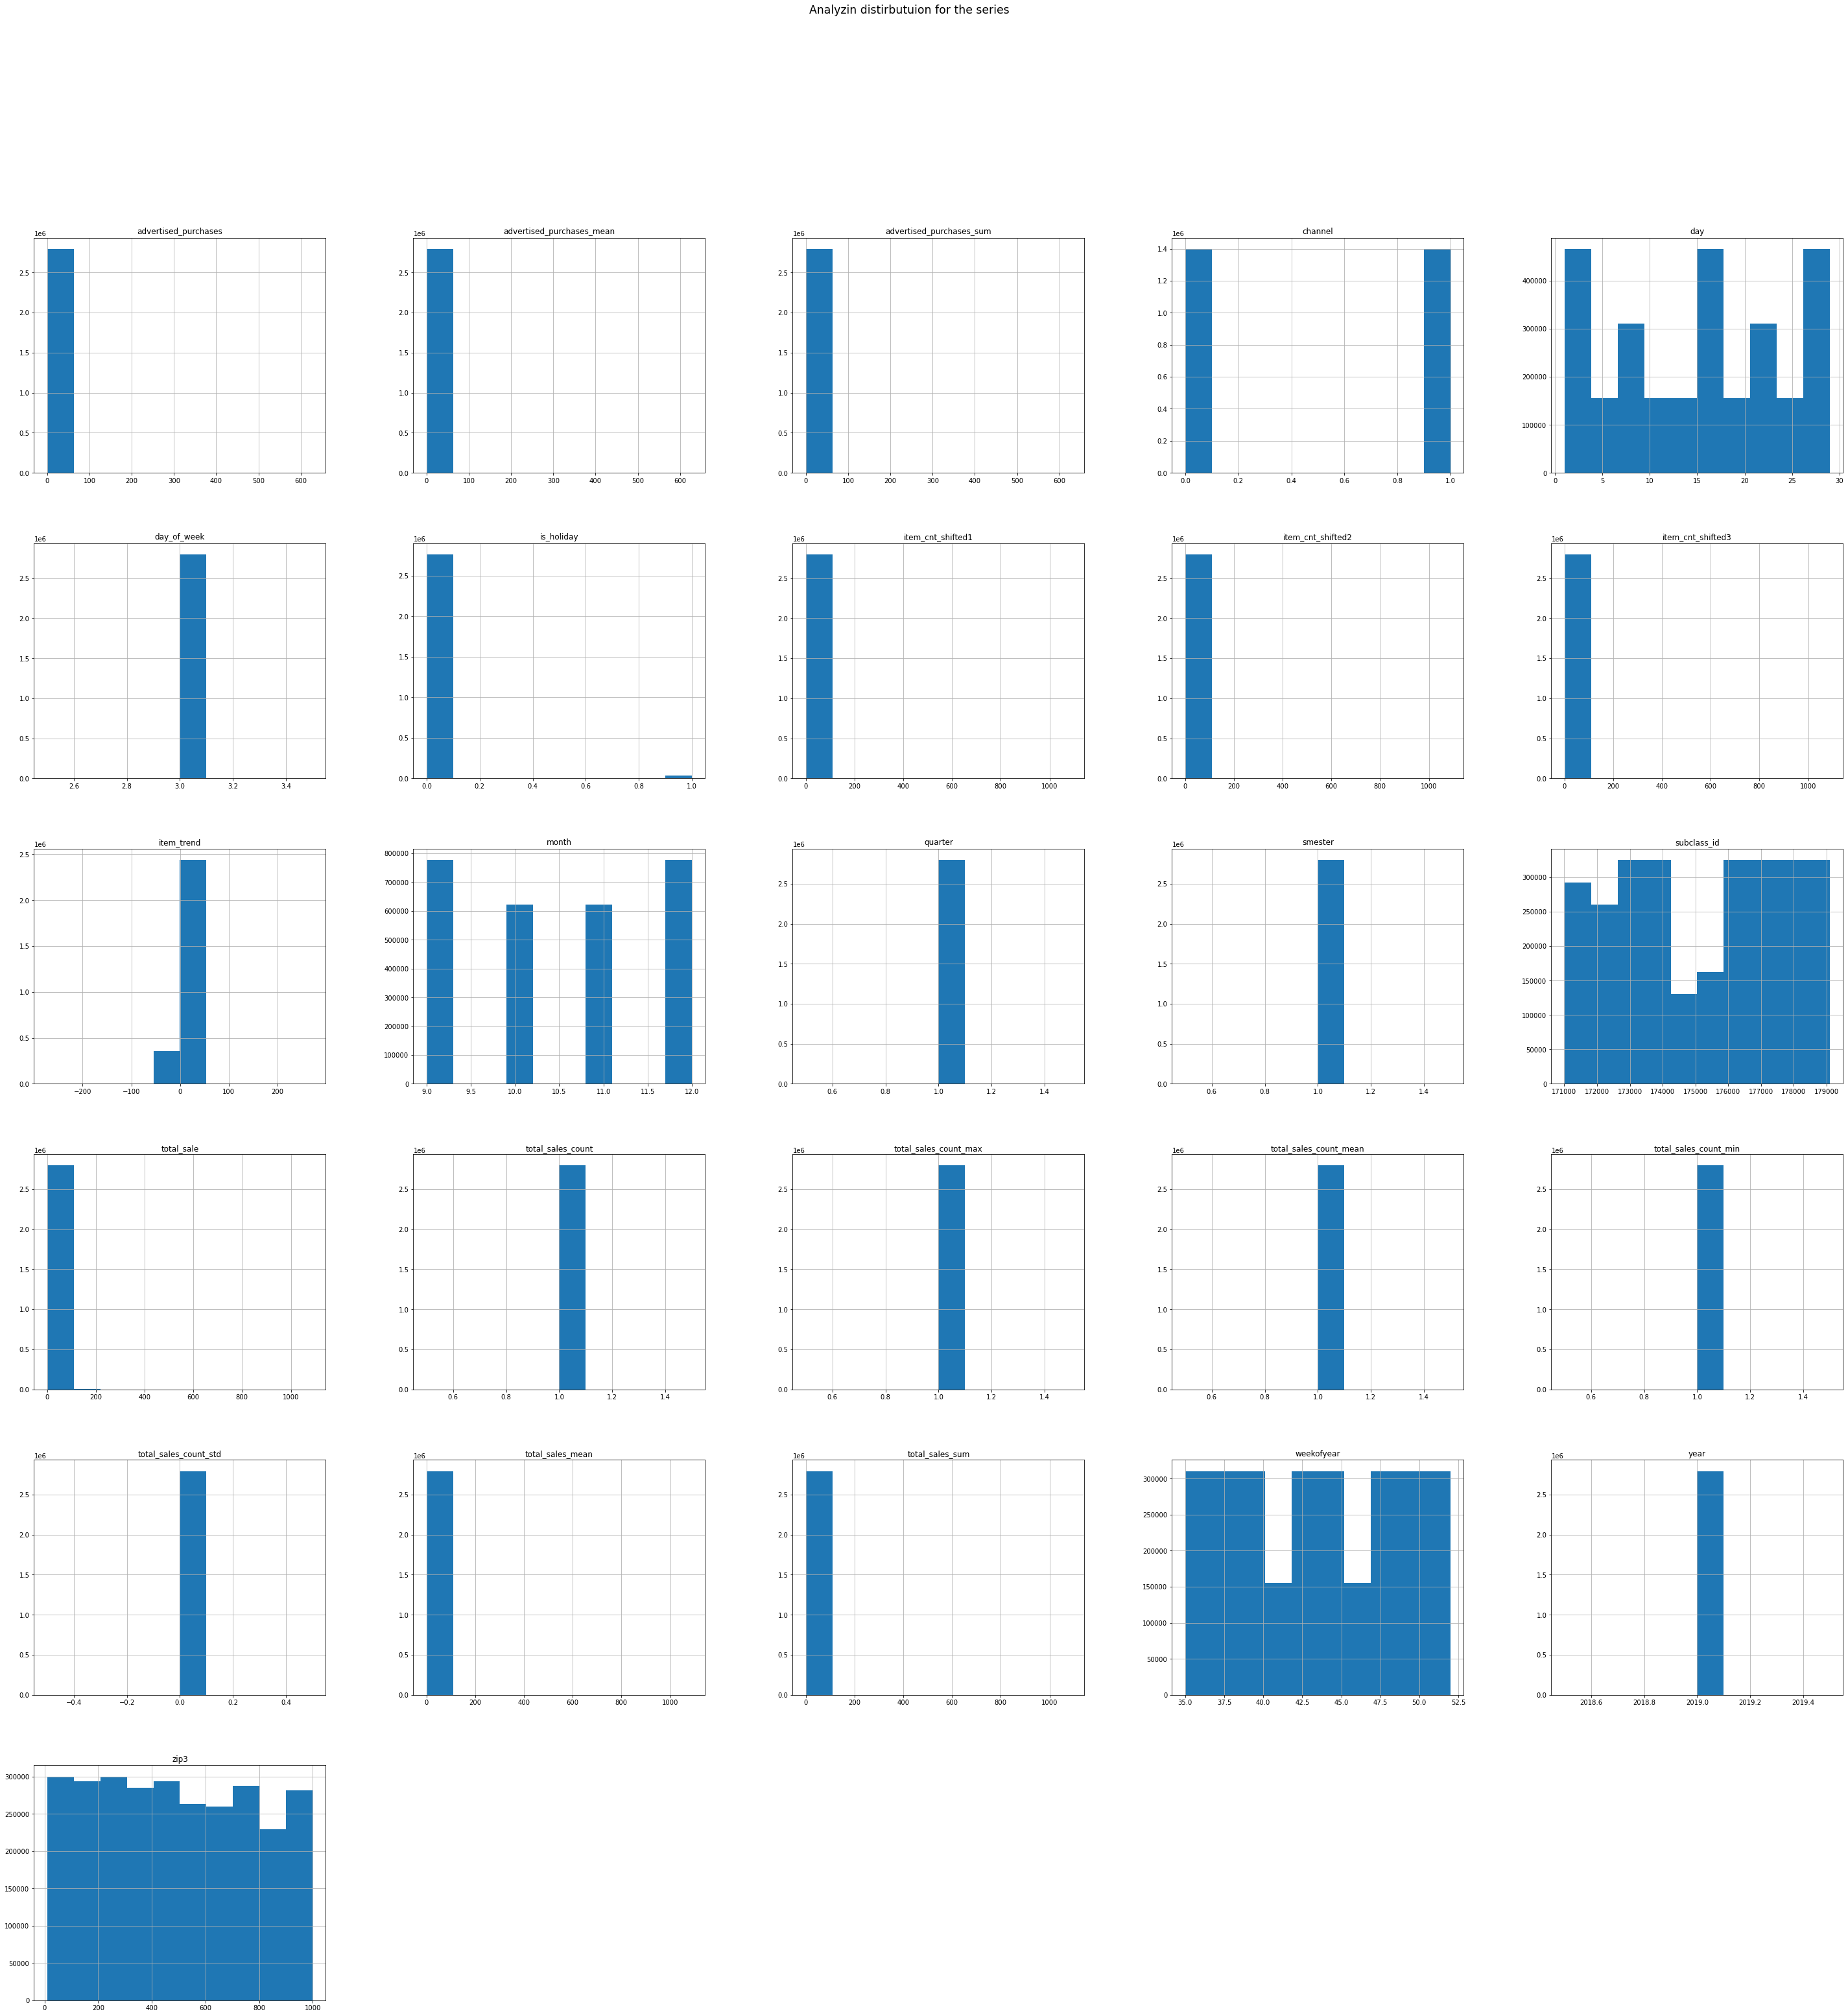

In [7]:
col = list(data)
import pylab
data.hist(
    column=col,
    figsize=(50, 50)
        )
pylab.suptitle("Analyzin distirbutuion for the series" , fontsize="xx-large")

## Visualize dataset

In [9]:
from sklearn.utils import shuffle
data=shuffle(data)

# Labels are the values we want to predict

In [10]:
import numpy as np
target = np.array(data['total_sale'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('total_sale', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
## Split the data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            target, test_size = 0.25, 
                                                                            random_state = 42)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2096766, 25)
Training Labels Shape: (2096766,)
Testing Features Shape: (698922, 25)
Testing Labels Shape: (698922,)


# Radom Forest Model

In [13]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees + # Train the model on training data
rand_forest_model = RandomForestRegressor(n_estimators = 120, max_features='sqrt',
                                          random_state = 42 , n_jobs=10).fit(train_features, train_labels)

# Evaluate our model with 10 Cross Validation 

In [14]:
from sklearn.model_selection import cross_val_score
predicted_cv = cross_val_score(rand_forest_model, train_features, train_labels, cv=10 )

np.mean(predicted_cv)

0.9716540274327155

# Use the forest's predict method on the test data

In [19]:
predictions = rand_forest_model.predict(test_features)
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
df = pd.DataFrame({'Actual': test_labels.flatten(), 'Predicted': predictions.flatten()})
df.head(25)

Actual  Predicted
0        0   0.000000
1        0   0.000000
2        0   0.000000
3        0   0.000000
4        0   0.000000
5        0   0.000000
6        0   0.000000
7        0   0.000000
8       63  60.333333
9        0   0.000000
10       0   0.000000
11       0   0.000000
12       0   0.000000
13       0   0.008333
14       0   0.000000
15       0   0.000000
16       0   0.000000
17       0   0.000000
18       0   0.000000
19       0   0.000000
20       0   0.000000
21       0   0.000000
22       0   0.000000
23       0   0.000000
24       0   0.000000

# Visualization Actual and Predicted value

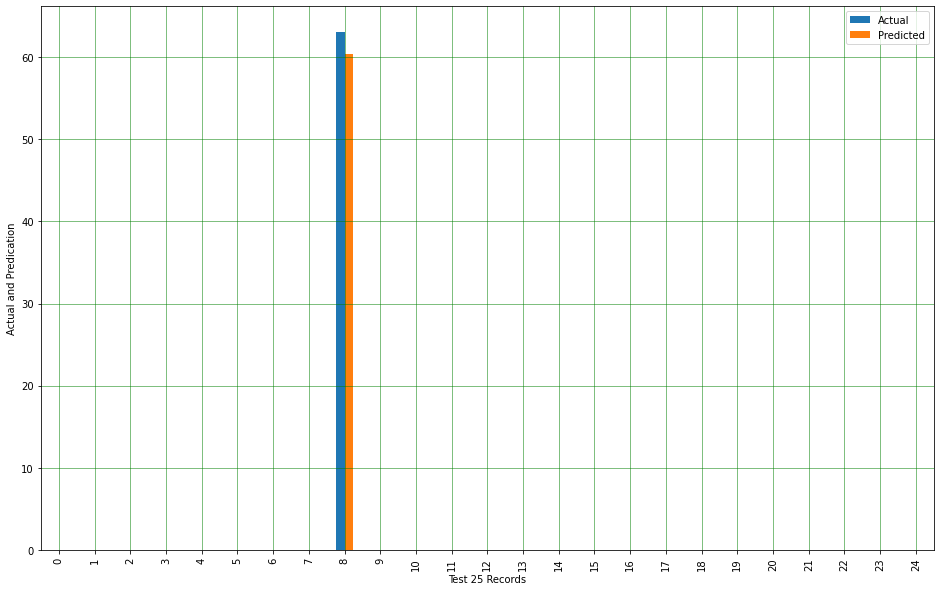

In [21]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Test 25 Records')
plt.ylabel('Actual and Predication')
plt.show()

# Test data metrics

In [22]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#Test data
print('Mean Absolute Error:', metrics.mean_absolute_error(predictions, test_labels))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, test_labels))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions, test_labels)))
print('R-Squared:', metrics.r2_score(predictions, test_labels))

Mean Absolute Error: 0.04453395133267136
Mean Squared Error: 0.5692811893609809
Root Mean Squared Error: 0.7545072493760289
R-Squared: 0.9817699559750634


# Variable Importances


In [23]:
# Get numerical feature importances
importances = list(rand_forest_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



Variable: advertised_purchases Importance: 0.5
Variable: item_trend           Importance: 0.44
Variable: zip3                 Importance: 0.01
Variable: subclass_id          Importance: 0.01
Variable: item_cnt_shifted1    Importance: 0.01
Variable: item_cnt_shifted2    Importance: 0.01
Variable: item_cnt_shifted3    Importance: 0.01
Variable: is_holiday           Importance: 0.0
Variable: channel              Importance: 0.0
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0
Variable: quarter              Importance: 0.0
Variable: smester              Importance: 0.0
Variable: day_of_week          Importance: 0.0
Variable: weekofyear           Importance: 0.0
Variable: advertised_purchases_sum Importance: 0.0
Variable: advertised_purchases_mean Importance: 0.0
Variable: total_sales_sum      Importance: 0.0
Variable: total_sales_count    Importance: 0.0
Variable: total_sales_mean     Importance: 0.

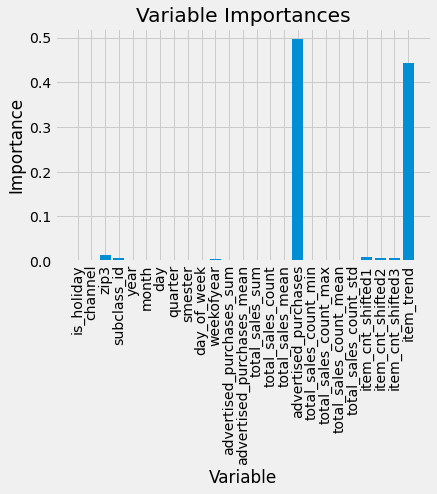

In [24]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');